In [9]:
#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from scipy import stats

In [10]:
#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

file_path = input("Masukkan Lokasi File (Klik Kanan > Copy as path): ")
sheet = input("Masukkan Nama Sheet (Untuk File Excel .xlsx): ")
independent_var = input("Masukkan Variabel Independen (var1, var2, var3): ")
dependent_var = input("Masukkan Variabel Dependen: ")

#-------CONTOH INPUT----------
#file_path = D:\Programming\\advertising.csv Sumber: https://www.kaggle.com/datasets/mehmetisik/advertisingcsv/data
#sheet = "Sheet1" #---> Untuk nama Sheet Excel (.xlsx).
#independent_var = "TV, radio, newspaper"
#dependent_var = "sales"

data = pd.read_csv(file_path) #---> Untuk file CSV.
#data = pd.read_excel(io=file_path, sheet_name=sheet) #---> Untuk file Excel (.xlsx).



UJI BEST LINEAR UNBIASED ESTIMATOR (BLUE)

1. Normality
   Residual berdistribusi normal jika Asymp. Sig. 2-tailed > 0.050.
2. Multicollinearity
   Variabel tidak berkorelasi satu sama lain jika VIF < 10 dan Tolerance > 0.10.
3. Heteroskedasticity
   Residual homoskedastis jika Prob. Chi-Square > 0.050.
4. Autocorrelation
   Residual tidak berkorelasi satu sama lain jika DW berada dalam range (dU, 4 - dU).

RUN KODE DI BAWAH UNTUK UJI BLUE.

In [ ]:
#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

add_constant = sm.add_constant(data)
independent_list = independent_var.split(", ")
new_independent = independent_list.insert(0, "const")
dependent_list = []
dependent_list.append(dependent_var)

equation = sm.OLS(endog=add_constant[dependent_list], exog=add_constant[independent_list])
model_fit = equation.fit()

#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

def normality_test():
    residuals = model_fit.resid
    
    ks_test, p_value = stats.ks_1samp(residuals, stats.norm.cdf, args=(np.mean(residuals), np.std(residuals, ddof=1)), method="asymp")

    print("----------------------------------------")
    print(" ")
    print(" " * 8 + "NORMALITY TEST")
    print(" ")
    print("Test Statistics" + " " * 8 + f": {ks_test:.4f}")
    print("Asymp. Sig. 2-tailed" + " " * 3 + f": {p_value:.4f}")
    print(" ")

def multicollinearity_test():
    multicollinearity = pd.DataFrame()
    multicollinearity["Variable"] = independent_list
    multicollinearity["VIF"] = [variance_inflation_factor(add_constant[independent_list].values, a) for a in range(len(independent_list))]
    multicollinearity["Tolerance"] = 1 / multicollinearity["VIF"]

    print("----------------------------------------")
    print(" ")
    print(" " * 8 + "MULTICOLLINEARITY TEST")
    print(" ")
    print(multicollinearity.drop(index=0))
    print(" ")

def heteroskedasticity_test():
    residuals = model_fit.resid

    white_test = het_white(resid=residuals, exog=add_constant[independent_list])

    print("----------------------------------------")
    print(" ")
    print(" " * 8 + "HETEROSKEDASTICITY TEST")
    print(" ")
    print("White Test Statistics" + " " * 2 + f": {white_test[0]:.4f}")
    print("Prob. Chi-Square" + " " * 7 + f": {white_test[1]:.4f}")
    print(" ")

def autocorrelation_test():
    residuals = model_fit.resid

    durbinwatson = sm.stats.durbin_watson(residuals)

    print("----------------------------------------")
    print(" ")
    print(" " * 8 + "AUTOCORRELATION TEST")
    print(" ")
    print("Durbin-Watson Statistics" + " " * 2 + f": {round(durbinwatson, 4)}")
    print("Independent Variables" + " " * 5 + f": {len(independent_list)-1}")
    print("Dependent Variable" + " " * 8 + f": {len(dependent_list)}")
    print(" ")
    print("----------------------------------------")
    
normality_test()
multicollinearity_test()
heteroskedasticity_test()
autocorrelation_test()

Jika lolos uji BLUE, maka hasil regresi sah untuk diinterpretasikan.

RUN KODE DI BAWAH UNTUK MELIHAT MODEL FIT (PERSAMAAN REGRESI LINEAR).

In [ ]:
#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

def model_fit():

    reg = sm.OLS(exog=add_constant[independent_list], endog=add_constant[dependent_list])
    reg_fit = reg.fit()

    print(reg_fit.summary())

model_fit()

#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

PROOF OF CALIBRATION

1. Normality (One Sample Kolmogorov-Smirnov with IBM SPSS Statistics 27)
![Proof of Calibration - Normality.png](<attachment:Proof of Calibration - Normality.png>)

2. Multicollinearity (VIF and Tolerance with IBM SPSS Statistics 27)
![Proof of Calibration - Multicolinearity.png](<attachment:Proof of Calibration - Multicolinearity.png>)

3. Heteroskedasticity (White Test with EViews 13)
![Proof of Calibration - Heteroskedasticity.png](<attachment:Proof of Calibration - Heteroskedasticity.png>)

4. Autocorrelation (Durbin-Watson with IBM SPSS Statistics 27)
![Proof of Calibration - Autocorrelation.png](<attachment:Proof of Calibration - Autocorrelation.png>)

5. Model Fit (EViews 13)
![Proof of Calibration - Model Fit.png](<attachment:Proof of Calibration - Model Fit.png>)
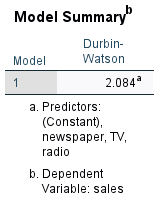
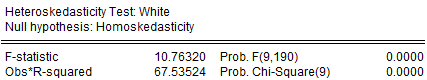
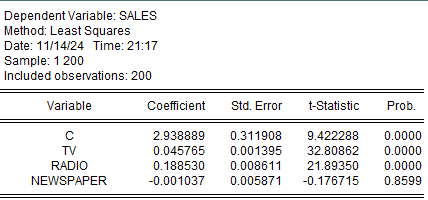
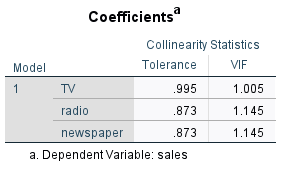
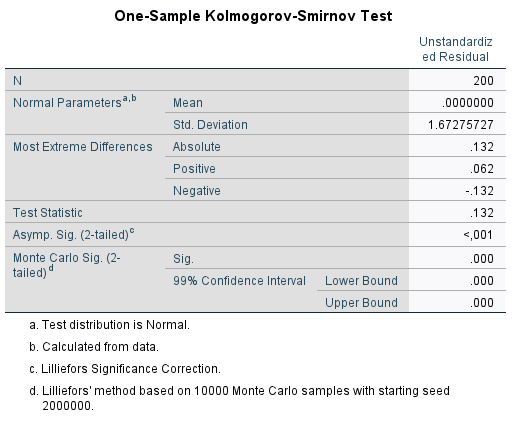